In [3]:
import cv2
import tensorflow
import numpy as np
import tensorflow as tf
from glob import glob
from keras.models import Model
from keras.layers import StringLookup
import keras.backend as K
from src.Models import Easter2
import matplotlib.pyplot as plt
from IPython.display import Image as ShowImage
from PIL import Image

In [11]:
INPUT_WIDTH = 2000
INPUT_HEIGHT = 80
charset = ['[UNK]', ' ', '!', '#', '%', "'", '(', ')', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '=', '?', '@', 'A', 'D', 'H', 'I', 'M', 'N', 'R', 'S', 'T', 'U', 'W', 'X', 'Y', '[', '\\', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'w', 'y', 'z', '|', '~', '&', 'ä', 'ü', 'ö', '[BLK]']
charset2 = ["[UNK]", "!", "#", "%", "'", "(", ")", "+", "-", ".", "/", "0", "1","2","3","4","5","6","7","8","9",":","=","?","@","A","D","H","I","M","N","R","S","T","U","W","X","Y","[","\\","]","_","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","r","s","t","u","w","y","z", "|", "~", "§", "&", "ä", "ü", "ö", '[BLK]']

In [15]:
len(charset2)


73

In [14]:
len(charset)

73

In [2]:

ocr_model = Easter2(classes=len(charset))
ocr_model.load_weights("Models\\LhasaKanjur\\LhasaKanjur_easter_v2.hdf5")
inference_model = Model(ocr_model.get_layer("images").input, ocr_model.get_layer("Final").output)

In [27]:
test_set = "D:\\Datasets\\Tibetan\\LhasaKanjur\\Testset"
test_images = glob(f"{test_set}/*.jpg")

print(f"Test Images: {len(test_images)}")

Test Images: 33


In [28]:
def show_image(img):
    display(Image.fromarray(img))
    

def read_image(image_path: str, binarize: bool = False):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    if binarize:
        clahe = cv2.createCLAHE(clipLimit=0.8, tileGridSize=(24,24))
        image = clahe.apply(image)
        image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 11)
    return image

def prepare_image(image: np.array):
    tf_img = tf.expand_dims(image, axis=-1)

    tf_img = tf.image.resize_with_pad(tf_img, INPUT_HEIGHT, INPUT_WIDTH)
    tf_img = tf.transpose(tf_img, perm=[1, 0, 2])
    tf_img = tf_img / 255.0
    
    #tf_img = tf.expand_dims(tf_img, axis=0)

    return tf_img

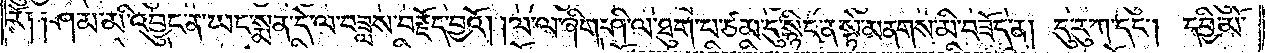

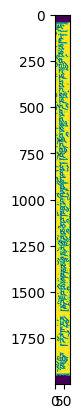

In [31]:
img_idx = 10
prepared_img = read_image(test_images[img_idx])
show_image(prepared_img)
prepared_img = prepare_image(prepared_img)


plt.imshow(prepared_img)


1/1 [==============================] - 0s 60ms/step
[59, 57, 66, 1, 66, 60, 50, 43, 55, 1, 55, 43, 1, 5, 44, 64, 62, 56, 49, 1, 56, 43, 1, 64, 43, 56, 49, 1, 60, 55, 43, 56, 1, 46, 47, 1, 54, 43, 1, 44, 65, 54, 43, 60, 1, 44, 59, 52, 57, 46, 1, 44, 64, 43, 5, 57, 11, 1, 11, 54, 43, 1, 54, 43, 1, 65, 50, 51, 49, 1, 60, 50, 51, 1, 54, 43, 1, 61, 50, 62, 49, 1, 58, 43, 1, 61, 60, 43, 55, 1, 46, 62, 1, 60, 56, 64, 51, 56, 49, 1, 56, 43, 1, 60, 61, 47, 1, 55, 56, 43, 49, 60, 1, 55, 51, 1, 44, 65, 57, 46, 1, 56, 43, 11, 1, 46, 62, 1, 59, 62, 1, 53, 43, 1, 46, 43, 56, 49, 1, 11, 1, 46, 44, 64, 51, 1, 55, 57, 1]
Results: ro| |sham ma 'byung na yang sman de la bzlas brjod bya'o/ /la la zhig shi la thug pa tsam du snying na ste mnags mi bzod na/ du ru ka dang / dbyi mo 


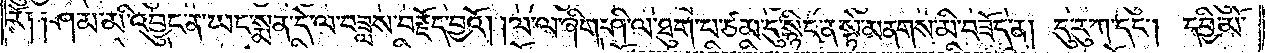

In [29]:
prediction = inference_model.predict(prepared_img, verbose=1)
out = K.get_value(K.ctc_decode(prediction,
                                    input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                                    greedy=True)[0][0])[0]

filtered_out= np.delete(out, np.where(out == -1))
filtered_list = filtered_out.tolist()
print(filtered_list)
decoded = "".join(charset[x] for x in filtered_list)

print(f"Results: {decoded}")
ShowImage(test_images[img_idx])

#### Check with other Data

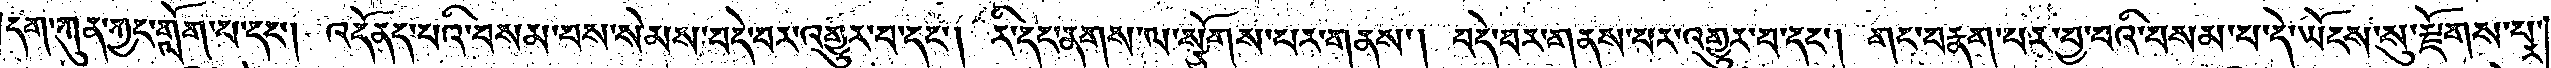

(1, 2000, 80, 1)


In [6]:
glo_test = "Data\\GlomanThang\\test\\test_line_glo_man_thang.jpg"
glo_test_img = read_image(glo_test, binarize=True)
show_image(glo_test_img)

glo_test_img = prepare_image(glo_test_img)

print(glo_test_img.shape)

1/1 [==============================] - 1s 920ms/step
[46, 43, 49, 1, 53, 62, 56, 1, 53, 43, 56, 49, 1, 53, 54, 57, 49, 1, 58, 43, 1, 46, 43, 56, 49, 11, 1, 5, 57, 56, 1, 46, 43, 1, 58, 5, 51, 1, 44, 43, 44, 1, 55, 1, 44, 43, 1, 44, 43, 1, 5, 49, 64, 62, 59, 1, 58, 43, 1, 46, 11, 1, 58, 51, 1, 43, 56, 1, 56, 43, 49, 58, 43, 49, 1, 58, 1, 43, 11, 1, 62, 58, 43, 56, 11, 1, 43, 1, 43, 46, 1, 58, 43, 56, 60, 1, 54, 62, 1, 46, 57, 49, 60, 1, 58, 43, 1]
Results: dag kun kang klog pa dang/ 'on da p'i bab m ba ba 'gyur pa d/ pi an nagpag p a/ upan/ a ad pans lu dogs pa 


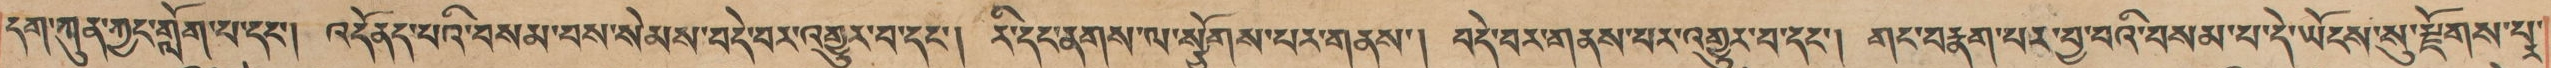

In [7]:
prediction = inference_model.predict(glo_test_img, verbose=1)
out = K.get_value(K.ctc_decode(prediction,
                                    input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                                    greedy=True)[0][0])[0]

filtered_out= np.delete(out, np.where(out == -1))
filtered_list = filtered_out.tolist()
print(filtered_list)
decoded = "".join(charset[x] for x in filtered_list)

print(f"Results: {decoded}")
ShowImage(glo_test)

#### Run Gloman Thang Model

In [16]:
glo_ocr_model = Easter2(classes=len(charset2))
glo_ocr_model.load_weights("Models\\GlomanThang\\GlomanThang_easter2.hdf5")
glo_inference_model = Model(glo_ocr_model.get_layer("images").input, glo_ocr_model.get_layer("Final").output)

1/1 [==============================] - 0s 61ms/step
[45, 42, 48, 0, 52, 61, 55, 0, 52, 63, 42, 55, 48, 0, 52, 53, 56, 48, 0, 57, 42, 0, 45, 42, 55, 48, 0, 10, 0, 4, 45, 56, 55, 45, 0, 57, 42, 4, 50, 0, 43, 59, 42, 54, 0, 57, 42, 59, 0, 59, 46, 54, 59, 0, 43, 45, 46, 0, 43, 42, 58, 0, 4, 48, 63, 61, 58, 0, 43, 42, 0, 45, 42, 55, 48, 0, 10, 0, 58, 50, 0, 45, 42, 55, 48, 0, 55, 42, 48, 59, 0, 53, 42, 0, 59, 60, 59, 56, 48, 59, 0, 57, 42, 58, 0, 48, 55, 42, 59, 0, 10, 0, 43, 45, 46, 0, 43, 42, 58, 0, 48, 55, 42, 59, 0, 57, 42, 58, 0, 4, 48, 63, 61, 58, 0, 43, 42, 0, 45, 42, 55, 48, 0, 10, 0, 48, 42, 55, 48, 0, 43, 58, 45, 42, 61, 48, 0, 57, 42, 58, 0, 43, 63, 42, 0, 43, 42, 4, 50, 0, 43, 59, 42, 54, 0, 57, 42, 0, 45, 46, 0, 63, 56, 55, 48, 59, 0, 59, 61, 0, 58, 45, 64, 56, 48, 59, 0, 57]
Results: dag kun kyang klog pa dang / 'dond pa'i bsam pas sems bde bar 'gyur ba dang / ri dang nags la stsogs par gnas / bde bar gnas par 'gyur ba dang / gang brdaug par bya ba'i bsam pa de yongs su rdzogs

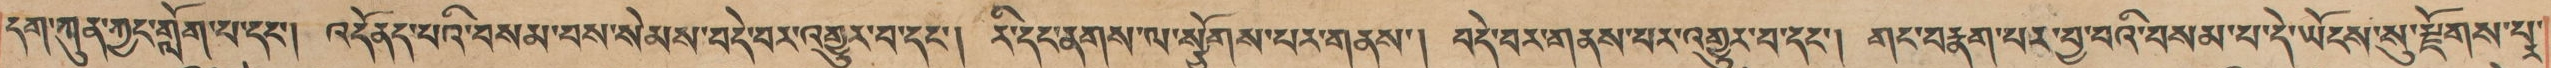

In [19]:
prediction = glo_inference_model.predict(glo_test_img, verbose=1)
out = K.get_value(K.ctc_decode(prediction,
                                    input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                                    greedy=True)[0][0])[0]

filtered_out= np.delete(out, np.where(out == -1))
filtered_list = filtered_out.tolist()
print(filtered_list)
decoded = "".join(charset2[x] for x in filtered_list)
decoded = decoded.replace("[UNK]", " ")
print(f"Results: {decoded}")
ShowImage(glo_test)

In [21]:
glo_inference_model.save("KerasModel")

INFO:tensorflow:Assets written to: KerasModel\assets


INFO:tensorflow:Assets written to: KerasModel\assets
